In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]

# Grid Search

In [2]:
NUM_OF_FOLDS = 10
df = pd.read_csv('./data/Grid_HOKEY_EPOCHS_BATCH_kfolds_10.csv', index_col=[0])

In [3]:
batch_size = "param_batch_size"
epochs = "param_epochs"
grid_iterations = []
for opt in df.param_batch_size.unique():
    for lr in df.param_epochs.unique():
        grid_iterations.append(df[(df[batch_size]==opt) & (df[epochs]==lr)])

In [4]:
df_data = []
print(f'Mean scores for Adam with learning rate of 0.005:')
for itr in grid_iterations:
    batch = itr.param_batch_size.iloc[0]
    epochs = itr.param_epochs.iloc[0]
    mean_accuracy = round(itr.mean_test_score.iloc[0]* 100, 1)
    std_accuracy = itr.std_test_score.iloc[0]
    total_rank = itr.rank_test_score.iloc[0]
    result = f"Epochs: {epochs}, Batch Size of: {batch}. ACC: {mean_accuracy}%, RANK: {total_rank}"
    print(result)
    df_data.append({"Epochs": epochs, "Batch Size": batch, "ACC": mean_accuracy, "ACC STD": std_accuracy, "Score":  int(total_rank)})

Mean scores for Adam with learning rate of 0.005:
Epochs: 5, Batch Size of: 8. ACC: 83.9%, RANK: 12
Epochs: 10, Batch Size of: 8. ACC: 86.9%, RANK: 7
Epochs: 15, Batch Size of: 8. ACC: 85.6%, RANK: 10
Epochs: 5, Batch Size of: 16. ACC: 85.1%, RANK: 11
Epochs: 10, Batch Size of: 16. ACC: 86.7%, RANK: 8
Epochs: 15, Batch Size of: 16. ACC: 88.2%, RANK: 6
Epochs: 5, Batch Size of: 32. ACC: 85.7%, RANK: 9
Epochs: 10, Batch Size of: 32. ACC: 88.6%, RANK: 4
Epochs: 15, Batch Size of: 32. ACC: 88.9%, RANK: 3
Epochs: 5, Batch Size of: 64. ACC: 88.6%, RANK: 4
Epochs: 10, Batch Size of: 64. ACC: 89.0%, RANK: 2
Epochs: 15, Batch Size of: 64. ACC: 89.3%, RANK: 1


In [5]:
scores = pd.DataFrame(df_data).sort_values(['Score'])
scores

,Epochs,Batch Size,ACC,ACC STD,Score
11,15,64,89.3,0.031111,1
10,10,64,89.0,0.031992,2
8,15,32,88.9,0.025820,3
7,10,32,88.6,0.031447,4
9,5,64,88.6,0.031447,4
5,15,16,88.2,0.037581,6
1,10,8,86.9,0.020964,7
4,10,16,86.7,0.032961,8
6,5,32,85.7,0.065631,9
2,15,8,85.6,0.040369,10


In [6]:
NUM_OF_FOLDS = 5
df = pd.read_csv('./data/Grid_HOKEY__BATCH_64_128_kfolds_5.csv', index_col=[0])

In [7]:
batch_size = "param_batch_size"
epochs = "param_epochs"
grid_iterations = []
for opt in df.param_batch_size.unique():
    for lr in df.param_epochs.unique():
        grid_iterations.append(df[(df[batch_size]==opt) & (df[epochs]==lr)])

In [8]:
df_data = []
print(f'Mean scores for Adam with learning rate of 0.0005:')
for itr in grid_iterations:
    batch = itr.param_batch_size.iloc[0]
    epochs = itr.param_epochs.iloc[0]
    mean_accuracy = round(itr.mean_test_score.iloc[0]* 100, 1)
    std_accuracy = itr.std_test_score.iloc[0]
    total_rank = itr.rank_test_score.iloc[0]
    result = f"Epochs: {epochs}, Batch Size of: {batch}. ACC: {mean_accuracy}%, RANK: {total_rank}"
    print(result)
    df_data.append({"Epochs": epochs, "Batch Size": batch, "ACC": mean_accuracy, "ACC STD": std_accuracy, "Score":  int(total_rank)})

Mean scores for Adam with learning rate of 0.0005:
Epochs: 15, Batch Size of: 64. ACC: 89.1%, RANK: 1
Epochs: 15, Batch Size of: 128. ACC: 88.7%, RANK: 2


# Cross Validation

In [9]:
df = pd.read_csv('./data/LR_0.0005_BATCHESHAN_10_FOLDS_BATCH_32_64_128.csv', index_col=[0])

In [10]:
batch_sizes = df.groupby('batch_size')[['accaury','loss']].mean()
print(f'Using {batch_sizes.index.values} batch sizes with {df.epochs.max()} epochs the mean accaury and loss are:')
for index, row in batch_sizes.iterrows():
    print(f'For {index} batch size the mean accuary is: {round(row.accaury, 3)} and the mean loss is: {round(row.loss, 3)}.')

Using [ 32  64 128] batch sizes with 30 epochs the mean accaury and loss are:
For 32 batch size the mean accuary is: 0.902 and the mean loss is: 0.277.
For 64 batch size the mean accuary is: 0.903 and the mean loss is: 0.269.
For 128 batch size the mean accuary is: 0.907 and the mean loss is: 0.259.


In [11]:
df['fold'] = df['fold'].apply(lambda x: x if x<11 else x-10 if 10<x<21 else x-20)

In [12]:
learning_data = []
for i in range(df.shape[0]):
    raw_data_string = df.history_df.iloc[i].replace('{', '').replace('}', '').replace('\'', '')
    loss_string_data = raw_data_string.split('[')[1].split(']')[0].replace(' ', '').split(',')
    acc_string_data = raw_data_string.split('[')[2].split(']')[0].replace(' ', '').split(',')
    loss = (np.array(loss_string_data)).astype(float)
    acc = (np.array(acc_string_data)).astype(float)
    betch = df.iloc[i].batch_size
    for epoch in range(len(acc)):
        epoch_data = {
            "fold": i+1,
            "epoch": epoch+1,
            "loss": loss[epoch],
            "acc": acc[epoch],
            "betch": betch
        }
        learning_data.append(epoch_data)
training_df = pd.DataFrame(learning_data)

## Batch Size: 32

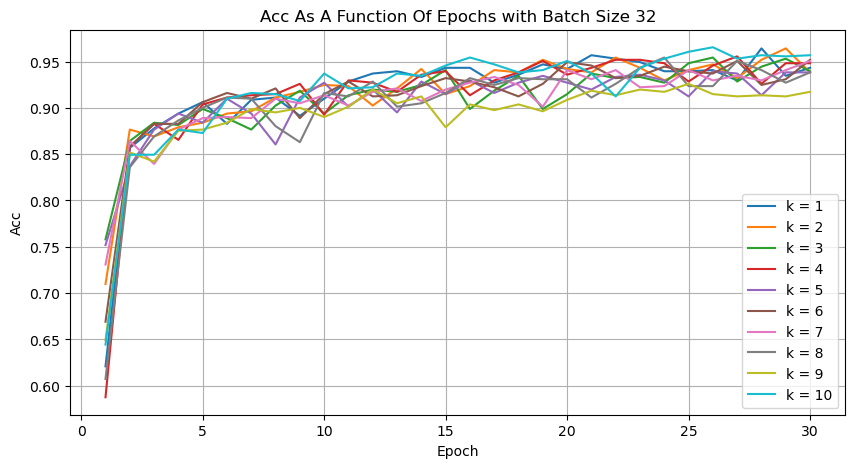

In [13]:
betch_size = 32
epoch_df = training_df[training_df.betch == betch_size]
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'acc'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with Batch Size {betch_size}')
plt.legend()

Text(0.5, 1.0, 'Average Acc As A Function Of Epochs with Batch Size 32')

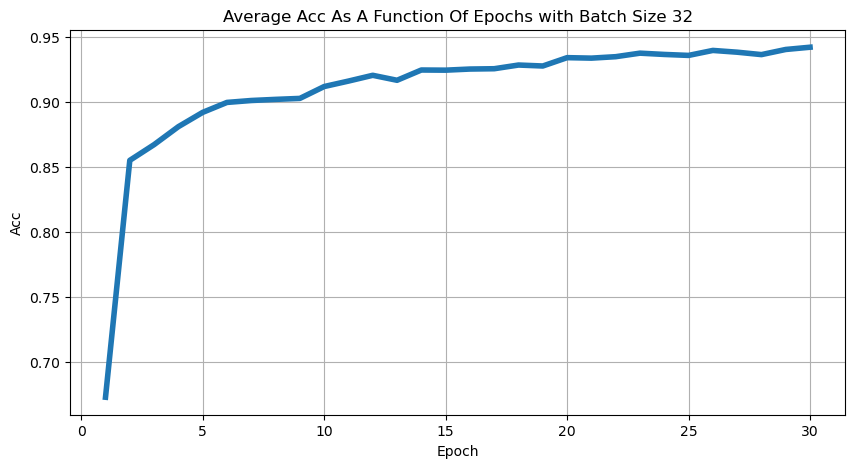

In [14]:
betch_size = 32
epoch_df = training_df[training_df.betch == betch_size]
target = 'acc'
x = epoch_df.epoch.unique()
y = epoch_df.groupby(['epoch'])[target].mean()
plt.plot(x, y, linewidth=4)
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title('Average ' + target.capitalize() + f' As A Function Of Epochs with Batch Size {betch_size}')

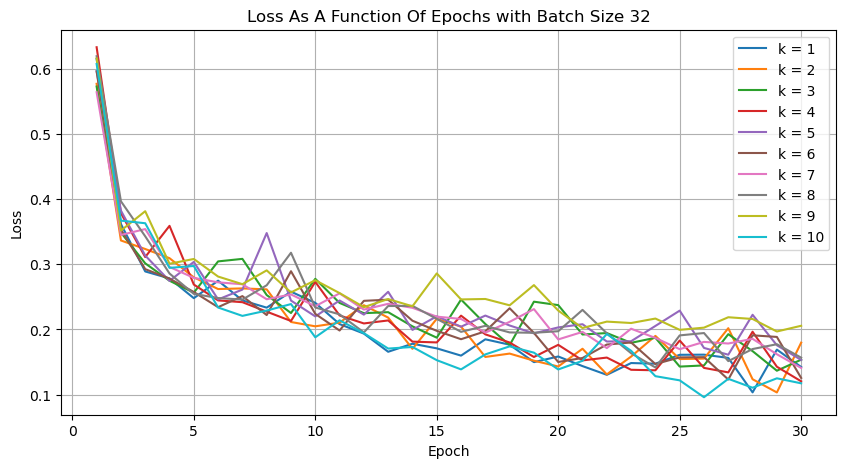

In [15]:
betch_size = 32
epoch_df = training_df[training_df.betch == betch_size]
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'loss'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with Batch Size {betch_size}')
plt.legend()

Text(0.5, 1.0, 'Average Loss As A Function Of Epochs with Batch Size 32')

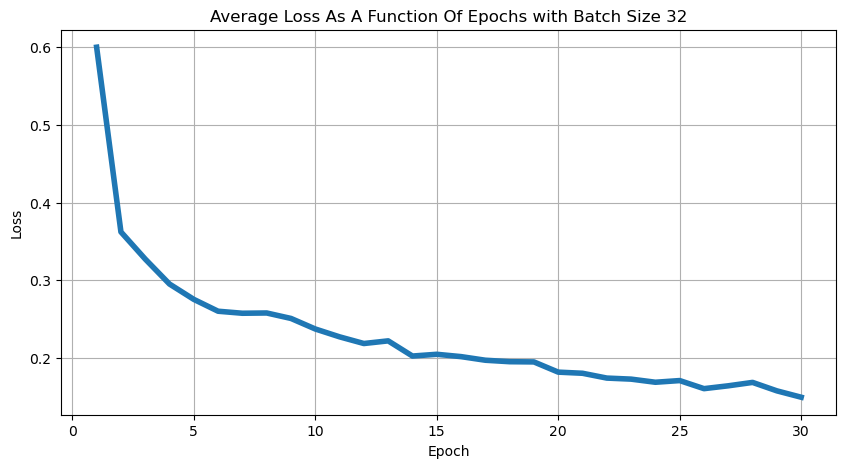

In [16]:
betch_size = 32
epoch_df = training_df[training_df.betch == betch_size]
target = 'loss'
x = epoch_df.epoch.unique()
y = epoch_df.groupby(['epoch'])[target].mean()
plt.plot(x, y, linewidth=4)
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title('Average ' + target.capitalize() + f' As A Function Of Epochs with Batch Size {betch_size}')

## Batch Size: 64

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
betch_size = 64

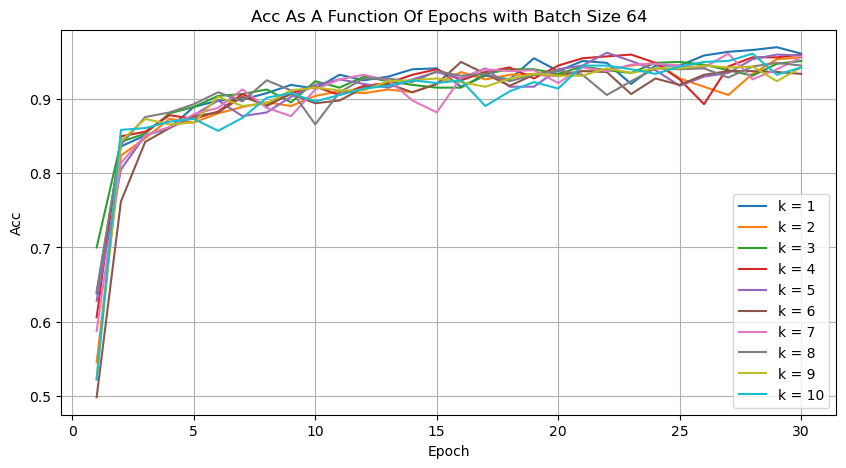

In [19]:
epoch_df = training_df[training_df.betch == betch_size]
epoch_df['fold'] = epoch_df['fold'].apply(lambda x: x if x<11 else x-10 if 10<x<21 else x-20)
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'acc'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with Batch Size {betch_size}')
plt.legend()

Text(0.5, 1.0, 'Average Acc As A Function Of Epochs with Batch Size 64')

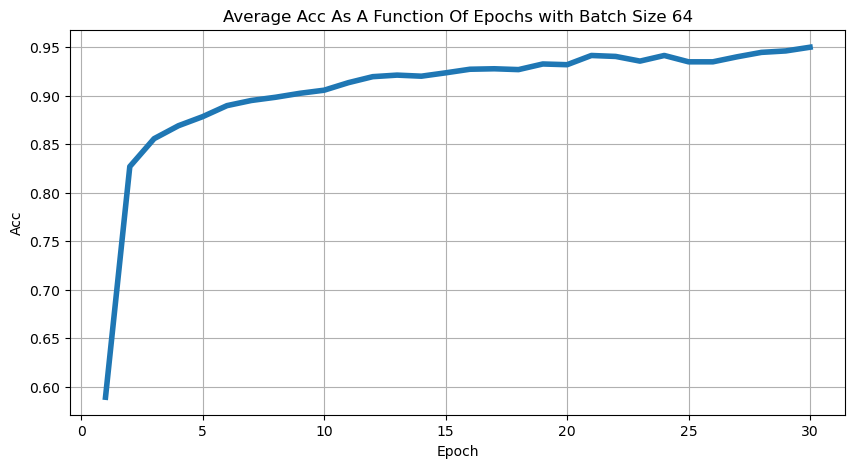

In [20]:
epoch_df = training_df[training_df.betch == betch_size]
target = 'acc'
x = epoch_df.epoch.unique()
y = epoch_df.groupby(['epoch'])[target].mean()
plt.plot(x, y, linewidth=4)
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title('Average ' + target.capitalize() + f' As A Function Of Epochs with Batch Size {betch_size}')

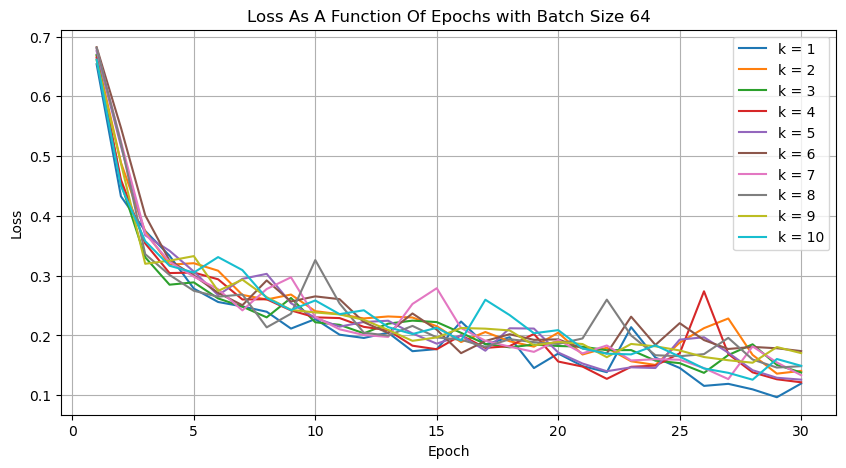

In [21]:
epoch_df = training_df[training_df.betch == betch_size]
epoch_df['fold'] = epoch_df['fold'].apply(lambda x: x if x<11 else x-10 if 10<x<21 else x-20)
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'loss'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with Batch Size {betch_size}')
plt.legend()

Text(0.5, 1.0, 'Average Loss As A Function Of Epochs with Batch Size 64')

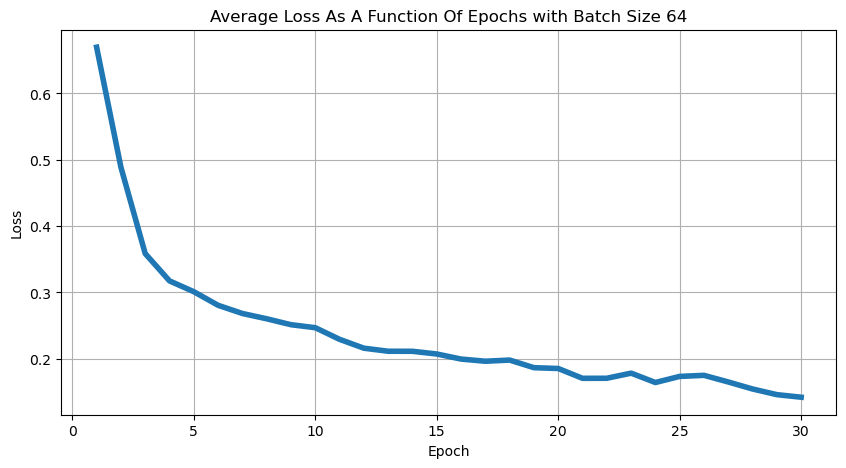

In [22]:
epoch_df = training_df[training_df.betch == betch_size]
target = 'loss'
x = epoch_df.epoch.unique()
y = epoch_df.groupby(['epoch'])[target].mean()
plt.plot(x, y, linewidth=4)
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title('Average ' + target.capitalize() + f' As A Function Of Epochs with Batch Size {betch_size}')

## Batch Size: 128

In [23]:
betch_size = 128

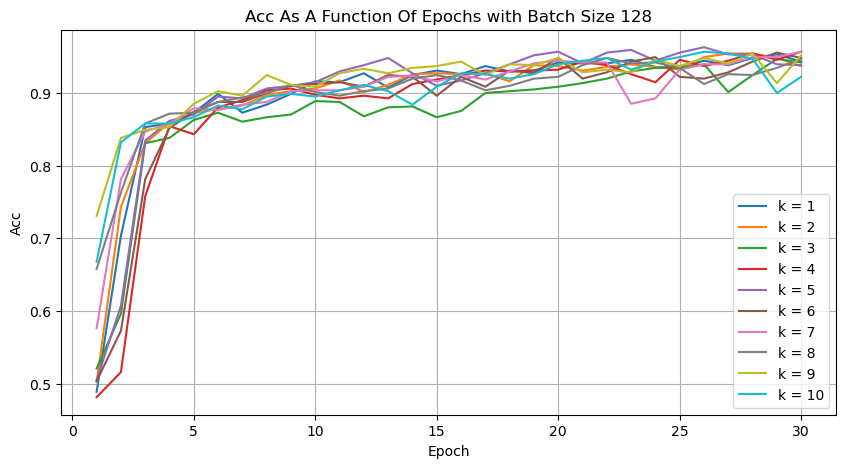

In [24]:
epoch_df = training_df[training_df.betch == betch_size]
epoch_df['fold'] = epoch_df['fold'].apply(lambda x: x if x<11 else x-10 if 10<x<21 else x-20)
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'acc'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with Batch Size {betch_size}')
plt.legend()

Text(0.5, 1.0, 'Average Acc As A Function Of Epochs with Batch Size 128')

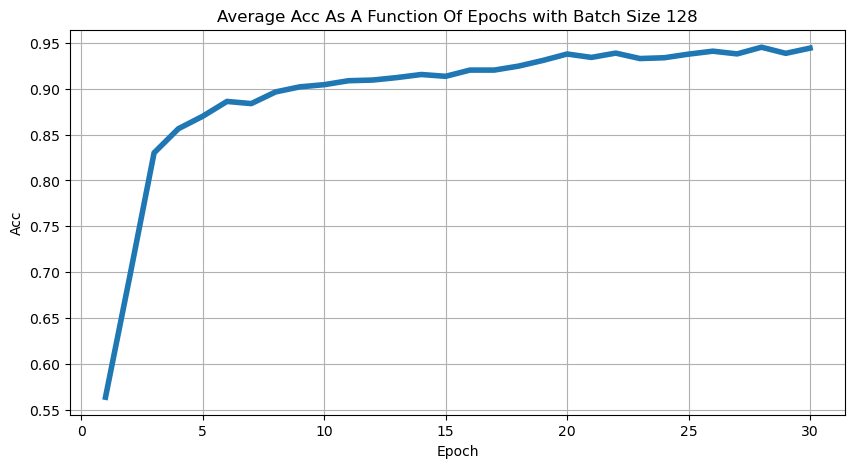

In [25]:
epoch_df = training_df[training_df.betch == betch_size]
target = 'acc'
x = epoch_df.epoch.unique()
y = epoch_df.groupby(['epoch'])[target].mean()
plt.plot(x, y, linewidth=4)
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title('Average ' + target.capitalize() + f' As A Function Of Epochs with Batch Size {betch_size}')

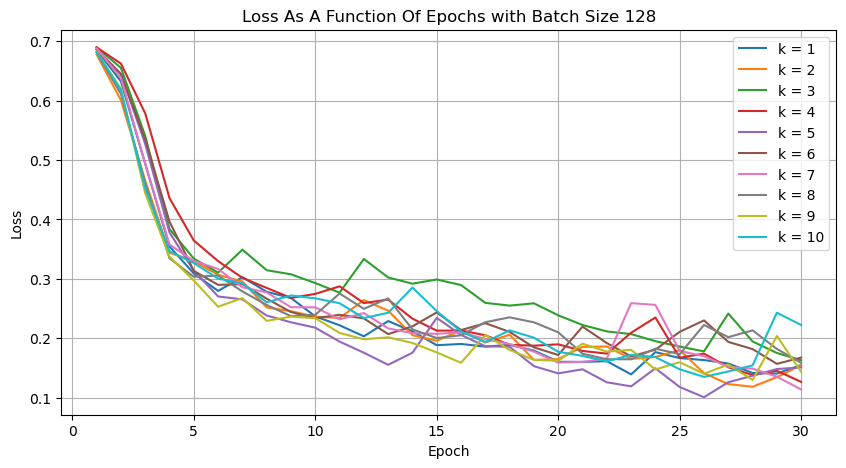

In [26]:
epoch_df = training_df[training_df.betch == betch_size]
epoch_df['fold'] = epoch_df['fold'].apply(lambda x: x if x<11 else x-10 if 10<x<21 else x-20)
x = epoch_df.epoch.unique()
num_of_folds = epoch_df.fold.max()
target = 'loss'
for i in range(num_of_folds):
    k_fold = i + 1
    y = epoch_df[epoch_df['fold'] == k_fold].set_index(['epoch']).drop(['fold'], axis=1)[target]
    plt.plot(x, y, label = f"k = {k_fold}")
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title(target.capitalize() + f' As A Function Of Epochs with Batch Size {betch_size}')
plt.legend()

Text(0.5, 1.0, 'Average Loss As A Function Of Epochs with Batch Size 128')

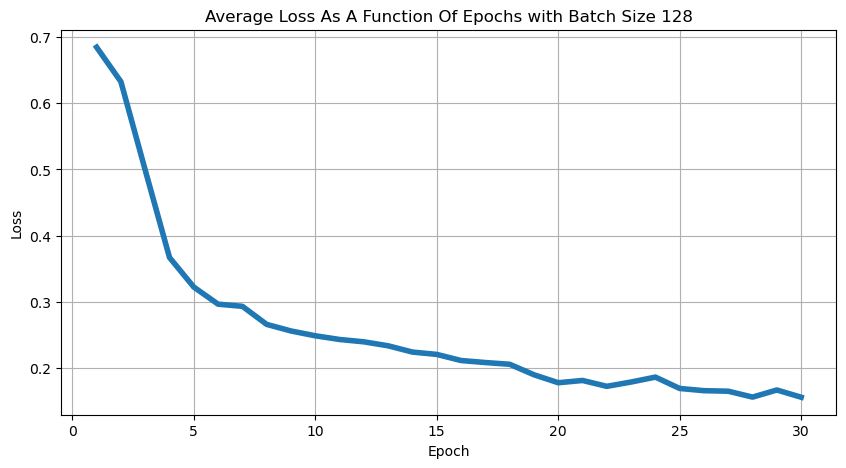

In [27]:
epoch_df = training_df[training_df.betch == betch_size]
target = 'loss'
x = epoch_df.epoch.unique()
y = epoch_df.groupby(['epoch'])[target].mean()
plt.plot(x, y, linewidth=4)
plt.xlabel('Epoch')
plt.grid()
plt.ylabel(target.capitalize())
plt.title('Average ' + target.capitalize() + f' As A Function Of Epochs with Batch Size {betch_size}')

# Summary

In [45]:
plt.rcParams['figure.figsize'] = [5, 2.5]

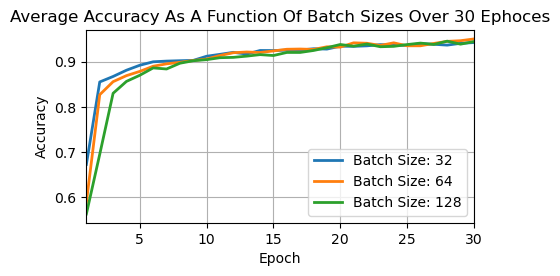

In [48]:
betch_sizes = [32,64,128]
for betch_size in betch_sizes:
    epoch_df = training_df[training_df.betch == betch_size]
    target = 'acc'
    x = epoch_df.epoch.unique()
    y = epoch_df.groupby(['epoch'])[target].mean()
    plt.plot(x, y, linewidth=2, label=f'Batch Size: {betch_size}')
    plt.xlabel('Epoch')
    plt.grid()
    plt.xlim([1, 30])
    plt.ylabel('Accuracy')
    plt.title('Average Accuracy As A Function Of Batch Sizes Over 30 Ephoces')
    plt.legend()
plt.show()

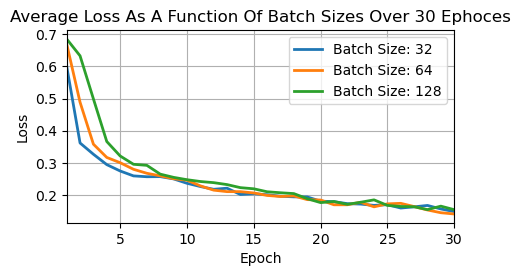

In [49]:
betch_sizes = [32,64,128]
for betch_size in betch_sizes:
    epoch_df = training_df[training_df.betch == betch_size]
    target = 'loss'
    x = epoch_df.epoch.unique()
    y = epoch_df.groupby(['epoch'])[target].mean()
    plt.plot(x, y, linewidth=2, label=f'Batch Size: {betch_size}')
    plt.xlabel('Epoch')
    plt.grid()
    plt.xlim([1, 30])
    plt.ylabel(target.capitalize())
    plt.title('Average Loss As A Function Of Batch Sizes Over 30 Ephoces')
    plt.legend()
plt.show()